Accuracy: 0.5
Precision: 0.5
Recall: 0.5
F1 Score: 0.5


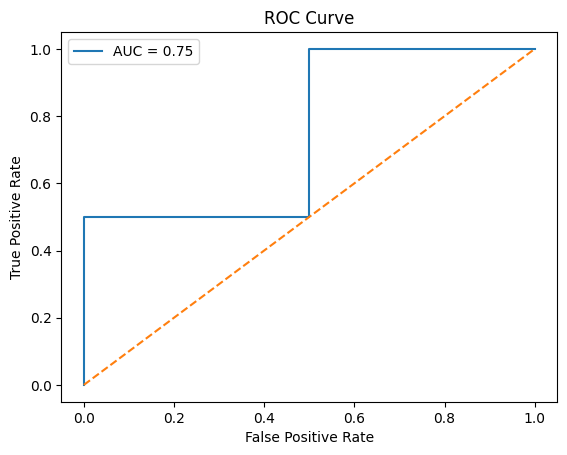

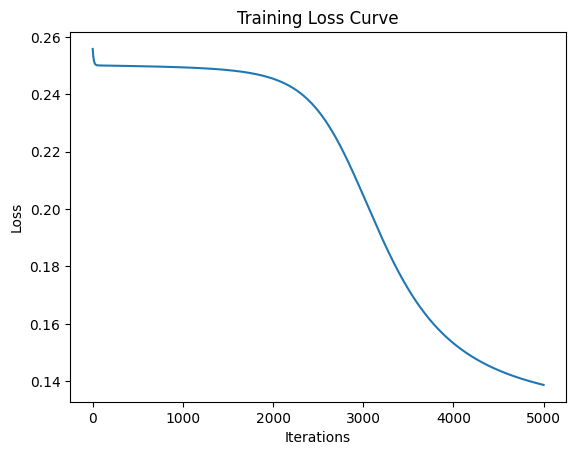

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return np.where(x > 0, 1, 0)


def train_mlp(hidden_activation='sigmoid', lr=0.1, iterations=5000):
    np.random.seed(42)
    W1 = np.random.randn(2, 2)
    b1 = np.zeros((1, 2))
    W2 = np.random.randn(2, 1)
    b2 = np.zeros((1, 1))

    loss_list = []

    for epoch in range(iterations):

        z1 = X.dot(W1) + b1
        if hidden_activation == 'sigmoid':
            a1 = sigmoid(z1)
            da1 = sigmoid_deriv(z1)
        else:
            a1 = relu(z1)
            da1 = relu_deriv(z1)

        z2 = a1.dot(W2) + b2
        a2 = sigmoid(z2)

        # Loss (MSE)
        loss = np.mean((y - a2) ** 2)
        loss_list.append(loss)


        dz2 = (a2 - y) * sigmoid_deriv(z2)
        dW2 = a1.T.dot(dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)

        dz1 = dz2.dot(W2.T) * da1
        dW1 = X.T.dot(dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)


        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

    return W1, b1, W2, b2, loss_list, a2


W1, b1, W2, b2, loss_list, y_pred_prob = train_mlp(hidden_activation='sigmoid', lr=0.1, iterations=5000)


y_pred = (y_pred_prob > 0.5).astype(int)


def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r)

acc = accuracy(y, y_pred)
prec = precision(y, y_pred)
rec = recall(y, y_pred)
f1 = f1_score(y, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


fpr, tpr, _ = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %.2f' % roc_auc)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()
